In [17]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import (
    train_test_split,
    TimeSeriesSplit,
    KFold,
    StratifiedKFold,
    GroupKFold,
    StratifiedGroupKFold,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Read in data and display first 5 rows
df = pd.read_csv (r'/content/Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
print('Shape of data{}'.format(df.shape))
print('No.of rows {} '.format(df.shape[0]))
print('No.of columns {} '.format(df.shape[1]))

Shape of data(5000, 14)
No.of rows 5000 
No.of columns 14 


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [21]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
print(df.isna().sum().sort_values(ascending=False))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [23]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [24]:
col = df.columns.values.tolist()

In [25]:
for c in col:
    df[c].fillna(value=df[c].mean(), inplace=True)

In [26]:
df=df.drop(['ID'],axis=1)
df=df.drop(['ZIP Code'],axis=1)

In [28]:
loan = np.unique(df['Personal Loan'], return_counts=True)
print('loan={}\n'.format(loan))

loan=(array([0, 1]), array([4520,  480]))



In [29]:
title_dict= {'family':'serif','color':'darkred','weight':'bold','size':16}
other_dict={'family':'serif','color':'black','size':14}

In [ ]:
fig = plt.figure(figsize=[16,15]);
ax1=fig.add_subplot(3,3,2);
sns.barplot(x=list(loan[0]),y=list(loan[1],ax=ax1);
ax1.text(0.2,2800,'{}%'.format(str(round(loan[1][0]))))           [0]/sum(loan[1])*100,1)))

In [30]:
categ_columns =[]
for col in df.columns:
  if df[col].nunique()<=5:
    if col!='Personal Loan':
      categ_columns.append(col)
print('categ numericals columns are {}'.format(categ_columns))

categ numericals columns are ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [32]:
Num_cols=[col for col in df.columns if col not in categ_columns]
print('numericals columns are {}'.format(Num_cols))

numericals columns are ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']


In [34]:
Num_cols.pop()
Num_cols

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [38]:
X = df.drop('Personal Loan' ,1)

In [39]:
y = df['Personal Loan']

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [41]:
print(model.feature_importances_)

[0.04204073 0.04216718 0.34483285 0.10250725 0.15843223 0.1561874
 0.0350124  0.01001977 0.07803285 0.01285867 0.01790866]


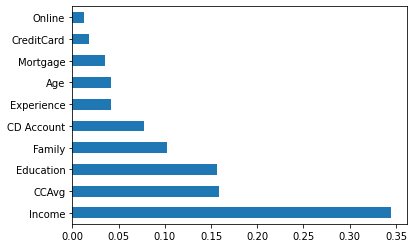

In [42]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [43]:
X=X.drop(['Securities Account'],axis=1)

In [44]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [45]:
X.shape

(5000, 10)

In [46]:
d_trees = np.arange(1, 200)
train_accuracy = np.empty(len(d_trees))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
for i in (d_trees):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    y_pred = rfc.predict(X_test)
    #metrics.accuracy_score(b_test, y_pred)
    train_accuracy[i-1] = metrics.accuracy_score(y_test, y_pred)

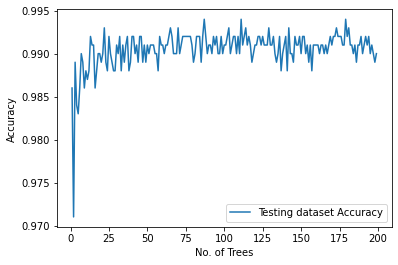

In [47]:
plt.plot(d_trees,train_accuracy, label = 'Testing dataset Accuracy')

 
plt.legend()
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy')

plt.show()

In [69]:
clf = RandomForestClassifier(random_state=3)

In [70]:
score_rf=cross_val_score(clf,X, y,cv=5)
print(score_rf)
print('avg',np.average(score_rf))

[0.989 0.988 0.986 0.993 0.987]
avg 0.9885999999999999


In [50]:
bg = BaggingClassifier(RandomForestClassifier(),max_samples=0.5, max_features=1.0,random_state=2)

In [51]:
score_rf_=cross_val_score(bg,X, y,cv=5)
print(score_rf_)
print('avg',np.average(score_rf_))

[0.987 0.983 0.983 0.988 0.987]
avg 0.9856


In [52]:
ad = AdaBoostClassifier(RandomForestClassifier(),learning_rate=0.01,random_state=4)

In [53]:
scorerf_=cross_val_score(ad,X, y,cv=5)
print(scorerf_)
print('avg',np.average(scorerf_))

[0.987 0.987 0.985 0.992 0.988]
avg 0.9878


In [54]:
model = GradientBoostingClassifier(random_state=6)

In [55]:
scoe_rf_=cross_val_score(model,X, y,cv=5)
print(scoe_rf_)
print('avg',np.average(scoe_rf_))

[0.987 0.988 0.98  0.99  0.987]
avg 0.9864


In [56]:
clf= SVC(kernel='linear',probability=True,random_state=1)

In [57]:
sore_r_f_=cross_val_score(clf,X, y,cv=5)
print(sore_r_f_)
print('avg',np.average(sore_r_f_))

[0.951 0.953 0.957 0.945 0.952]
avg 0.9515999999999998


In [58]:
clf= SVC(kernel='rbf',probability=True,random_state=1)

In [59]:
sore_r_f_=cross_val_score(clf,X, y,cv=5)
print(sore_r_f_)
print('avg',np.average(sore_r_f_))

[0.979 0.974 0.977 0.977 0.967]
avg 0.9747999999999999


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [61]:
modol = KNeighborsClassifier()

In [62]:
ore_r_f_=cross_val_score(modol,X, y,cv=5)
print(ore_r_f_)
print('avg',np.average(ore_r_f_))

[0.961 0.965 0.963 0.954 0.955]
avg 0.9596


In [63]:
clf_ = MLPClassifier(hidden_layer_sizes=(6,6),
                    max_iter = 60,
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [64]:
ore_r_f_=cross_val_score(clf_,X, y,cv=5)
print(ore_r_f_)
print('avg',np.average(ore_r_f_))

Iteration 1, loss = 0.55189563
Iteration 2, loss = 0.23634302
Iteration 3, loss = 0.19571994
Iteration 4, loss = 0.16816016
Iteration 5, loss = 0.14337037
Iteration 6, loss = 0.12044769
Iteration 7, loss = 0.10402410
Iteration 8, loss = 0.09283115
Iteration 9, loss = 0.08495206
Iteration 10, loss = 0.07826005
Iteration 11, loss = 0.07445670
Iteration 12, loss = 0.07141842
Iteration 13, loss = 0.06678023
Iteration 14, loss = 0.06516550
Iteration 15, loss = 0.06400175
Iteration 16, loss = 0.06192660
Iteration 17, loss = 0.05912129
Iteration 18, loss = 0.05811074
Iteration 19, loss = 0.05837381
Iteration 20, loss = 0.05736131
Iteration 21, loss = 0.05783856
Iteration 22, loss = 0.05656549
Iteration 23, loss = 0.05673750
Iteration 24, loss = 0.05590749
Iteration 25, loss = 0.05485786
Iteration 26, loss = 0.05448771
Iteration 27, loss = 0.05260130
Iteration 28, loss = 0.05429538
Iteration 29, loss = 0.05287129
Iteration 30, loss = 0.05086996
Iteration 31, loss = 0.05155631
Iteration 32, los